In [3]:
%load_ext autoreload
%autoreload 2

In [32]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pickle
import mni_utils as uti

from sklearn.linear_model import LinearRegression, Lasso

In [8]:
data_path = Path("F:\\iEEG_neural_dynamics\\MNIOpen")
res_tau_dir = "Results_acf_fit_exp"
res_tau_path = data_path.joinpath(res_tau_dir)
df_tau = pd.read_csv(res_tau_path.joinpath("all_tau.csv"), index_col=0)

In [17]:
pat_names = [f.stem for f in res_tau_path.iterdir() if f.is_dir()]

In [33]:
stage = "W"

df_acf_all = []
for pat in pat_names:
    acf_path = res_tau_path.joinpath(pat + "/ACF")
    with open(acf_path.joinpath(pat + "_" + stage.lower() + ".pkl"), "rb") as f:
        acf_data = pickle.load(f)
    df_acf = pd.DataFrame(columns=["pat", "chan"] + list(acf_data["lags"]))
    df_acf["pat"] = [pat] * acf_data["acf"].shape[1]
    df_acf["chan"] = acf_data["chans"]
    df_acf[acf_data["lags"]] = acf_data["acf"].mean(axis=0)
    df_acf_all.append(df_acf)

df_acf_all = pd.concat(df_acf_all)
X = df_acf_all.drop(columns=["pat", "chan"]).to_numpy(dtype=float)
y = df_tau[df_tau["stage"] == stage]["tau"].to_numpy(dtype=float)

R =  0.8145429263218165


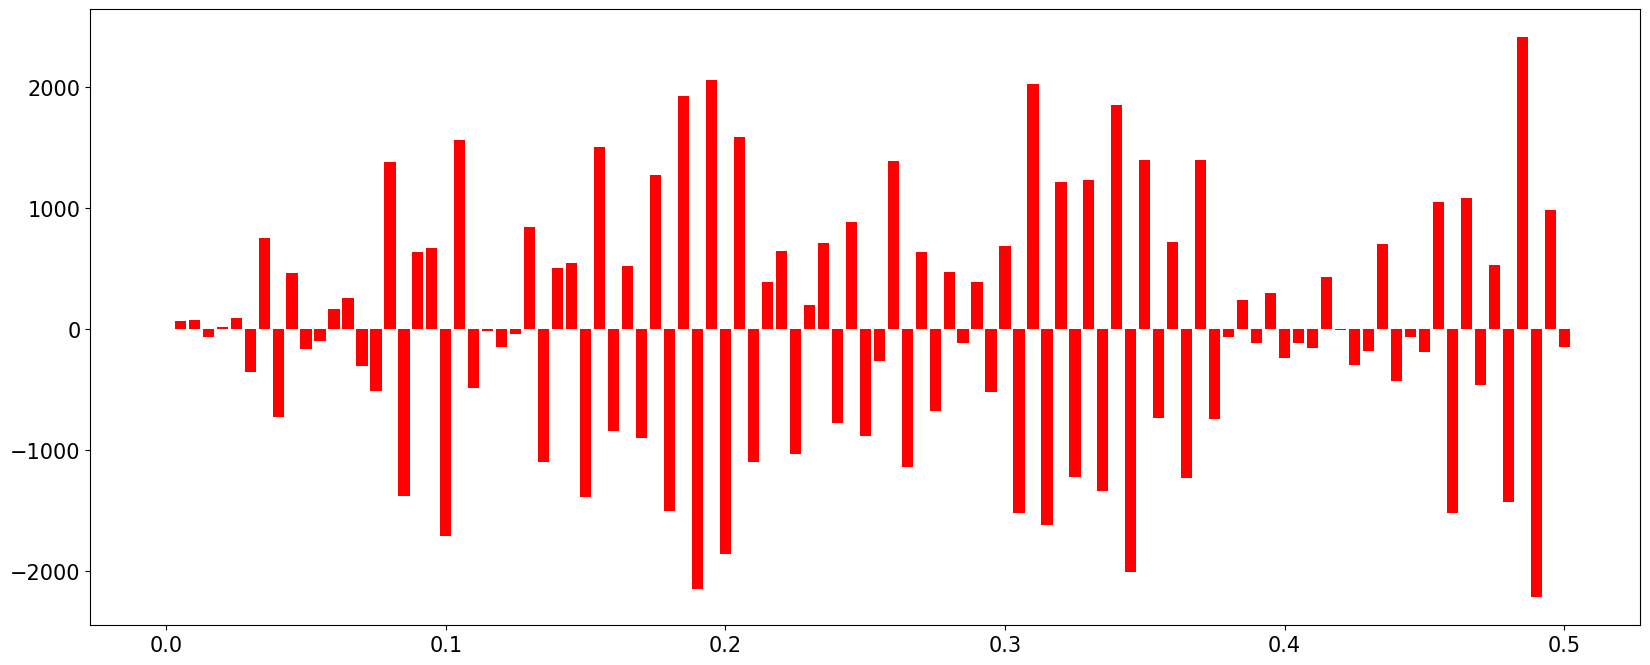

In [34]:
LR = LinearRegression()
LR.fit(X, y)

print("R = ", LR.score(X, y))

plt.figure(figsize=[20, 8])
plt.bar(df_acf_all.columns[2:], LR.coef_, width=0.004, color="r")
plt.show()

R =  0.6179100341548269


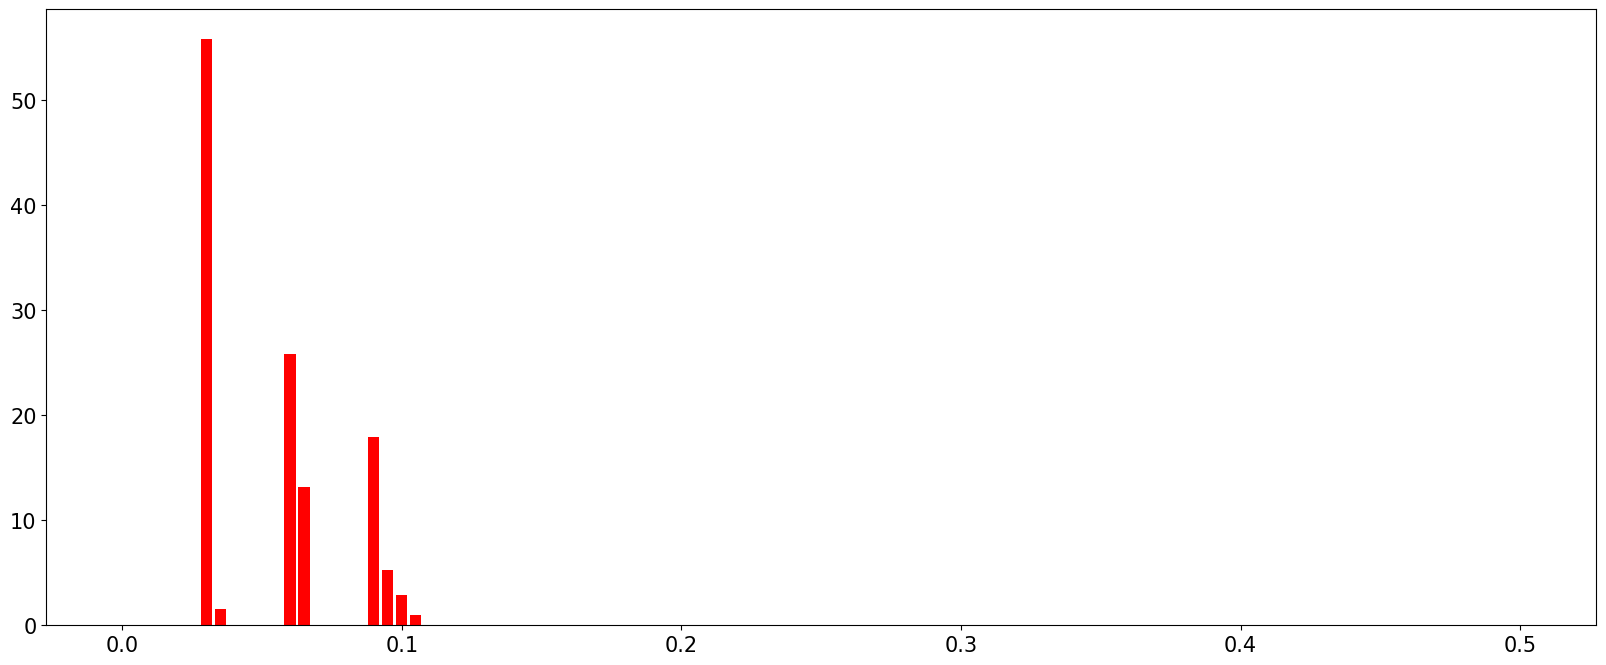

In [35]:
LRlasso = Lasso()
LRlasso.fit(X, y)

print("R = ", LRlasso.score(X, y))

plt.figure(figsize=[20, 8])
plt.bar(df_acf_all.columns[2:], LRlasso.coef_, width=0.004, color="r")
plt.show()


### N3

In [37]:
stage = "N3"

df_acf_all = []
for pat in pat_names:
    acf_path = res_tau_path.joinpath(pat + "/ACF")
    try:
        with open(acf_path.joinpath(pat + "_" + stage.lower() + ".pkl"), "rb") as f:
            acf_data = pickle.load(f)
    except FileNotFoundError:
        continue
    df_acf = pd.DataFrame(columns=["pat", "chan"] + list(acf_data["lags"]))
    df_acf["pat"] = [pat] * acf_data["acf"].shape[1]
    df_acf["chan"] = acf_data["chans"]
    df_acf[acf_data["lags"]] = acf_data["acf"].mean(axis=0)
    df_acf_all.append(df_acf)

df_acf_all = pd.concat(df_acf_all)
X = df_acf_all.drop(columns=["pat", "chan"]).to_numpy(dtype=float)
y = df_tau[df_tau["stage"] == stage]["tau"].dropna().to_numpy(dtype=float)

R =  0.8641382636611491


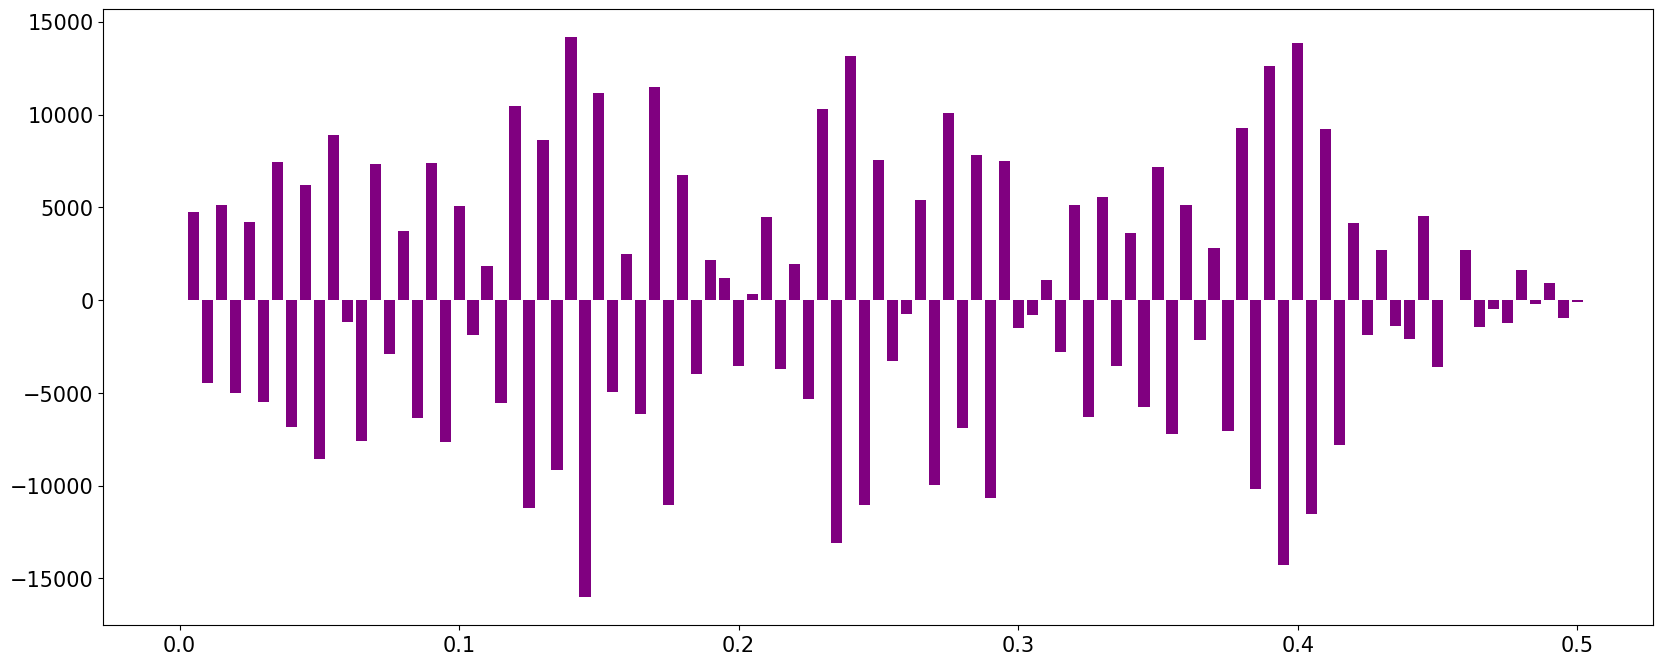

In [41]:
LR = LinearRegression()
LR.fit(X, y)

print("R = ", LR.score(X, y))

plt.figure(figsize=[20, 8])
plt.bar(df_acf_all.columns[2:], LR.coef_, width=0.004, color="purple")
plt.show()

R =  0.8305924046472912


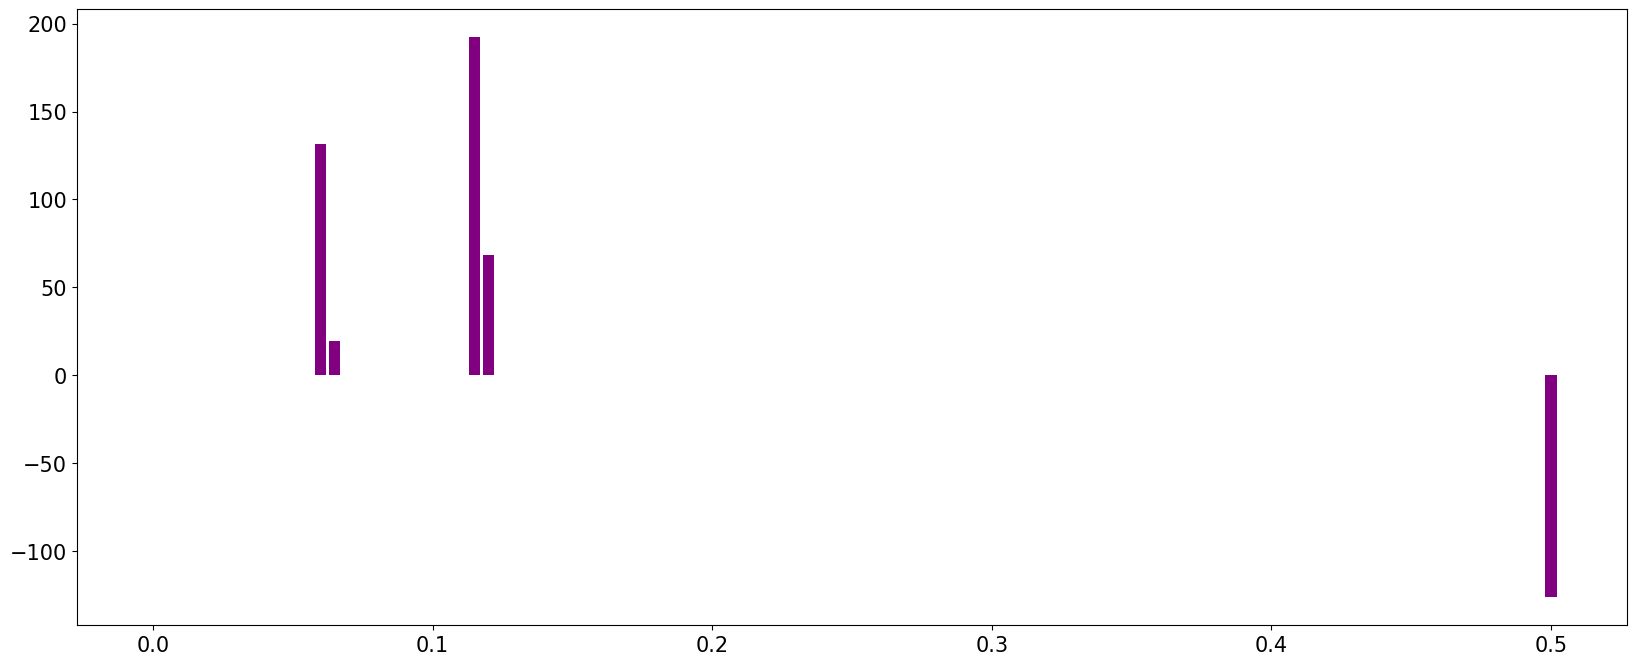

In [42]:
LRlasso = Lasso()
LRlasso.fit(X, y)

print("R = ", LRlasso.score(X, y))

plt.figure(figsize=[20, 8])
plt.bar(df_acf_all.columns[2:], LRlasso.coef_, width=0.004, color="purple")
plt.show()


### REM

In [44]:
stage = "R"

df_acf_all = []
for pat in pat_names:
    acf_path = res_tau_path.joinpath(pat + "/ACF")
    try:
        with open(acf_path.joinpath(pat + "_" + stage.lower() + ".pkl"), "rb") as f:
            acf_data = pickle.load(f)
    except FileNotFoundError:
        continue
    df_acf = pd.DataFrame(columns=["pat", "chan"] + list(acf_data["lags"]))
    df_acf["pat"] = [pat] * acf_data["acf"].shape[1]
    df_acf["chan"] = acf_data["chans"]
    df_acf[acf_data["lags"]] = acf_data["acf"].mean(axis=0)
    df_acf_all.append(df_acf)

df_acf_all = pd.concat(df_acf_all)
X = df_acf_all.drop(columns=["pat", "chan"]).to_numpy(dtype=float)
y = df_tau[df_tau["stage"] == stage]["tau"].dropna().to_numpy(dtype=float)

R =  0.823585224698256


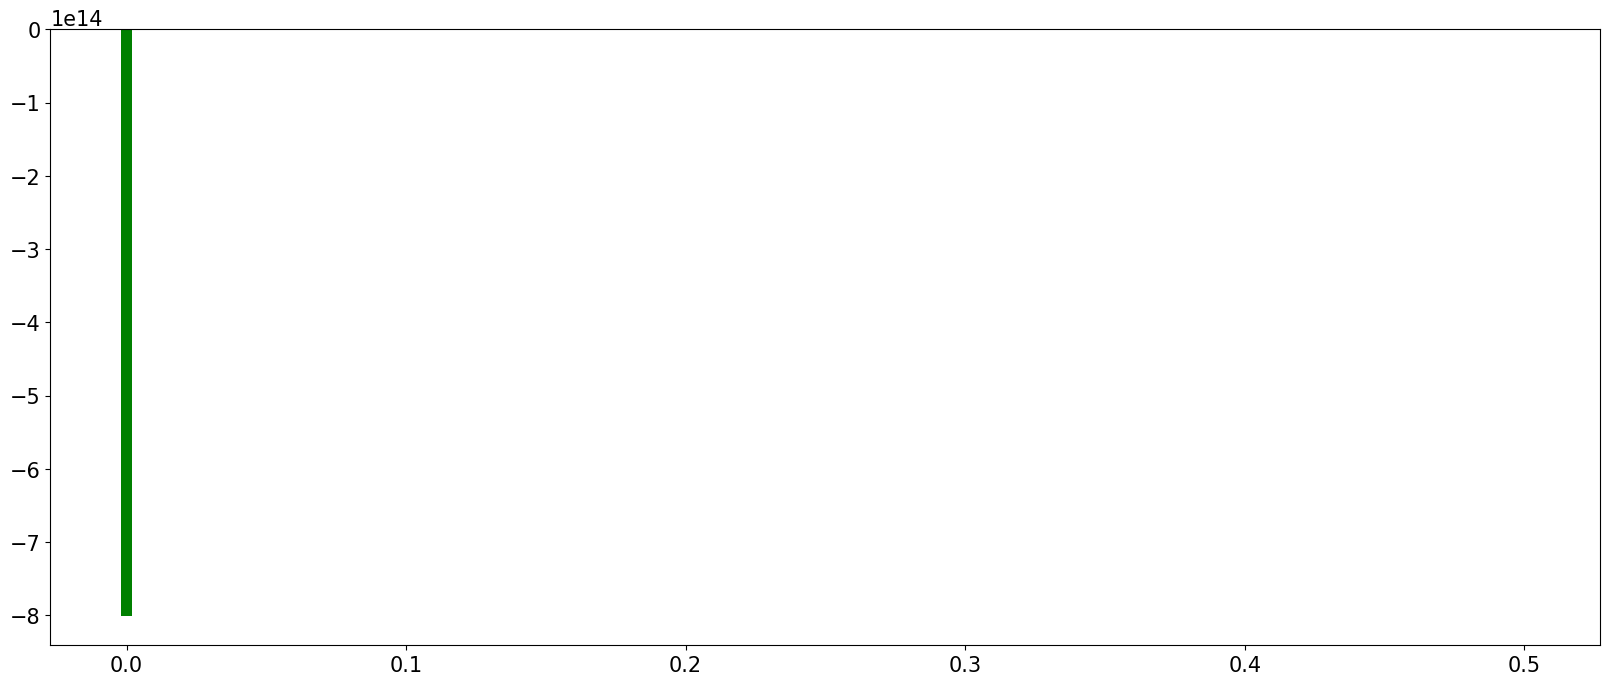

In [46]:
LR = LinearRegression()
LR.fit(X, y)

print("R = ", LR.score(X, y))

plt.figure(figsize=[20, 8])
plt.bar(df_acf_all.columns[2:], LR.coef_, width=0.004, color="g")
plt.show()

R =  0.7274320291967751


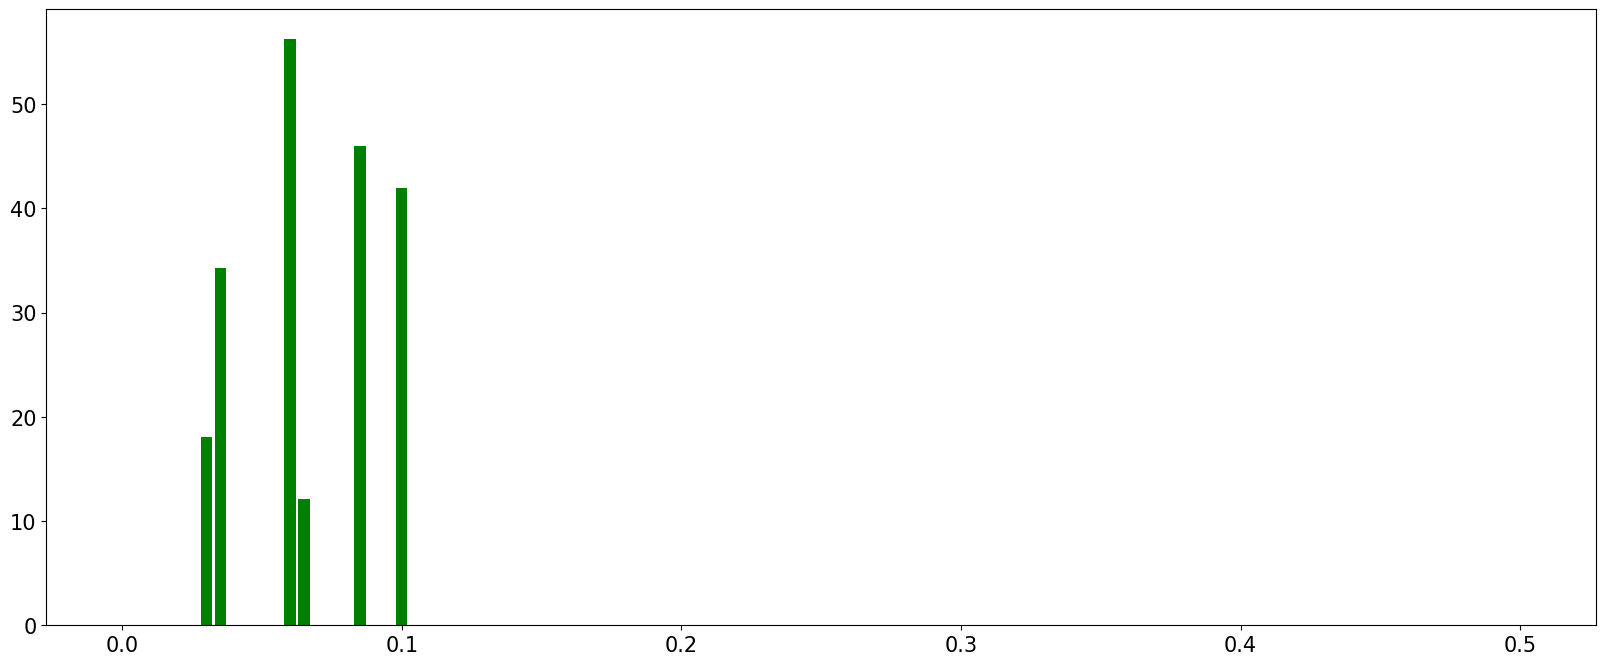

In [47]:
LRlasso = Lasso()
LRlasso.fit(X, y)

print("R = ", LRlasso.score(X, y))

plt.figure(figsize=[20, 8])
plt.bar(df_acf_all.columns[2:], LRlasso.coef_, width=0.004, color="g")
plt.show()
